# EN3160 Assignment 1 

## Question 01
Implement the intensity transformation depicted in Fig.a on the image shown in Fig.b.
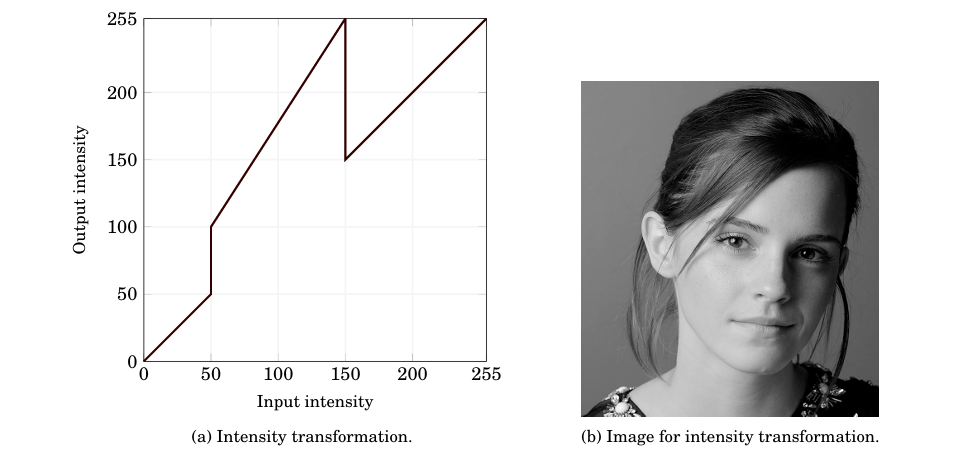

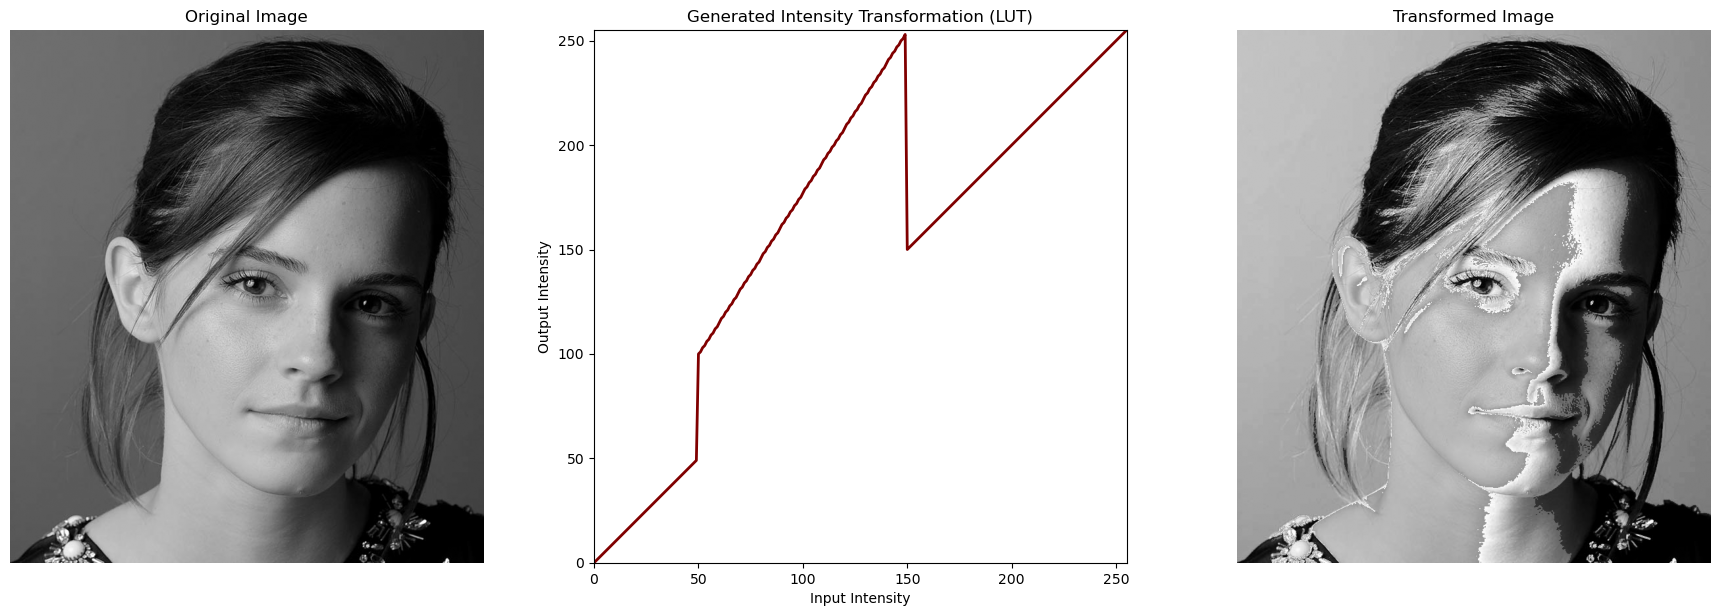

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE) # Load the image in grayscale format.
if img1 is None:
    raise FileNotFoundError("Image not found. Make sure the image is in correct location.")

# Create a Lookup Table (LUT) to store the piecewise function
lut = np.zeros(256, dtype=np.uint8)

for r in range(256):
    if r < 50:
        s = r
    elif r < 150:
        s = 1.55 * r + 22.5
    else:
        s = r  # for r >= 150

    lut[r] = np.clip(s, 0, 255) # limit the s values between 0 and 255

transformed_img = cv2.LUT(img1, lut) # Applying LUT

# Displaying results
fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].plot(lut, color='maroon', linewidth=2)
axs[1].set_title('Generated Intensity Transformation (LUT)')
axs[1].set_xlabel('Input Intensity')
axs[1].set_ylabel('Output Intensity')
axs[1].set_xlim([0, 255])
axs[1].set_ylim([0, 255])
axs[1].set_aspect('equal') # make the plot square-shaped

axs[2].imshow(transformed_img, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Transformed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()


## Question 02
Apply a similar operation as above (question 1) to accentuate  
 (a) white matter  
 (b) gray matter  
 in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.  
![image.png](a1images/brain_proton_density_slice.png)

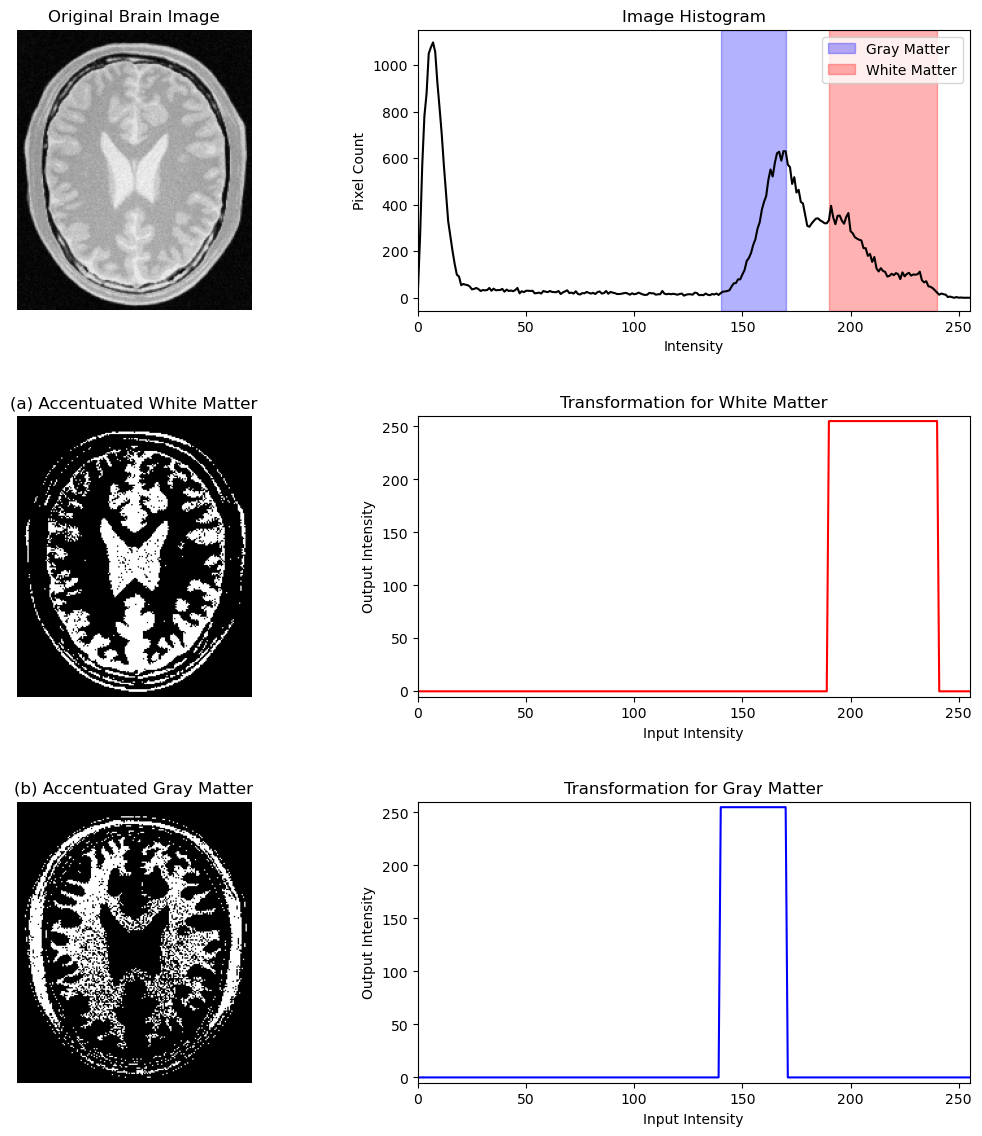

In [3]:
img2 = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)
if img2 is None:
    raise FileNotFoundError("Image not found. Make sure the image is in correct location.")

# Obtain the histogram to check where the intensities lie
hist = cv2.calcHist([img2], [0], None, [256], [0, 256])

# Ranges for gray matter and white matter (should edit after examining the histogram)
gray_matter_range = (140, 170)
white_matter_range = (190, 240)

# Intensities to highlight gray or white matter in each case
high_intensity = 255
low_intensity = 0

# LUT for white matter
lut_white = np.full(256, low_intensity, dtype=np.uint8)
lut_white[white_matter_range[0] : white_matter_range[1] + 1] = high_intensity

#LUT for gray matter
lut_gray = np.full(256, low_intensity, dtype=np.uint8)
lut_gray[gray_matter_range[0] : gray_matter_range[1] + 1] = high_intensity

white_accentuated_img = cv2.LUT(img2, lut_white)
gray_accentuated_img = cv2.LUT(img2, lut_gray)

# Displaying the results
fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(3, 2, 1)
ax1.imshow(img2, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Brain Image')
ax1.axis('off')

ax2 = plt.subplot(3, 2, 2)
ax2.plot(hist, color='black')
ax2.set_title('Image Histogram')
ax2.set_xlabel('Intensity')
ax2.set_ylabel('Pixel Count')
ax2.axvspan(gray_matter_range[0], gray_matter_range[1], color='blue', alpha=0.3, label='Gray Matter')
ax2.axvspan(white_matter_range[0], white_matter_range[1], color='red', alpha=0.3, label='White Matter')
ax2.legend()
ax2.set_xlim([0, 255])

ax3 = plt.subplot(3, 2, 3)
ax3.imshow(white_accentuated_img, cmap='gray', vmin=0, vmax=255)
ax3.set_title('(a) Accentuated White Matter')
ax3.axis('off')

ax4 = plt.subplot(3, 2, 4)
ax4.plot(lut_white, color='red')
ax4.set_title('Transformation for White Matter')
ax4.set_xlabel('Input Intensity')
ax4.set_ylabel('Output Intensity')
ax4.set_xlim([0, 255])
ax4.set_ylim([-5, 260])

ax5 = plt.subplot(3, 2, 5)
ax5.imshow(gray_accentuated_img, cmap='gray', vmin=0, vmax=255)
ax5.set_title('(b) Accentuated Gray Matter')
ax5.axis('off')

ax6 = plt.subplot(3, 2, 6)
ax6.plot(lut_gray, color='blue')
ax6.set_title('Transformation for Gray Matter')
ax6.set_xlabel('Input Intensity')
ax6.set_ylabel('Output Intensity')
ax6.set_xlim([0, 255])
ax6.set_ylim([-5, 260])

plt.tight_layout(pad=3.0)
plt.show()


## Question 03
Consider the image shown in Fig. 3.  
 (a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.  
 (b) Show the histograms of the original and corrected images.  
 ![image.png](a1images/highlights_and_shadows.jpg)

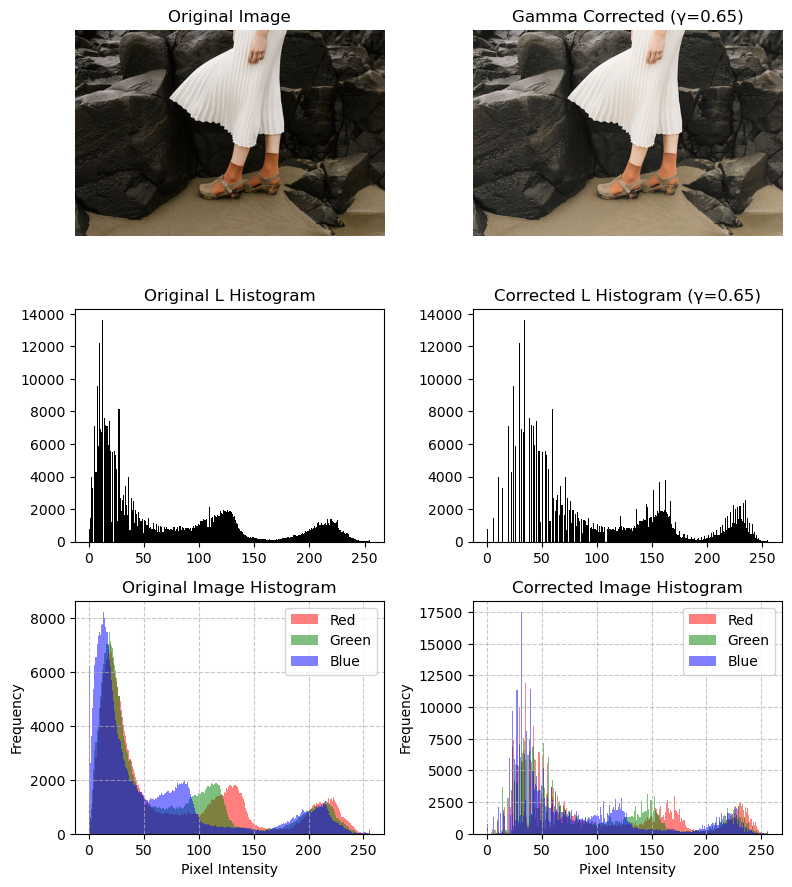

In [8]:
img3 = cv2.imread('a1images/highlights_and_shadows.jpg')
if img3 is None:
    raise FileNotFoundError("Image not found. Make sure the image is in correct location.")

# Convert the image into L*a*b and split channels
lab = cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)
img_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
L, a, b = cv2.split(lab)

# Normalize L to [0,1]
L_norm = L / 255

# Gamma Correction
gamma = 0.65 # <1 so brightens
L_gamma = np.power(L_norm, gamma)

# Rescale back to [0,255]
L_corrected = np.uint8(L_gamma * 255)

# Merge and convert back to RGB (for plotting)
lab_corrected = cv2.merge((L_corrected,a,b))
img_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2RGB)

# Display Results
plt.figure(figsize=(12, 9))

plt.subplot(3, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(img_corrected)
plt.title(f"Gamma Corrected (γ={gamma})")
plt.axis("off")

# Histograms of L channel
plt.subplot(3, 3, 4)
plt.hist(L.flatten(), bins=256, color='black')
plt.title("Original L Histogram")

plt.subplot(3, 3, 5)
plt.hist(L_corrected.flatten(), bins=256, color='black')
plt.title(f"Corrected L Histogram (γ={gamma})")

# Histograms of images
r, g, b = cv2.split(img_rgb)
r1, g1, b1 = cv2.split(img_corrected)

plt.subplot(3,3,7)
plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red', range=(0, 256))
plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green', range=(0, 256))
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue', range=(0, 256))

plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 3, 8)
plt.hist(r1.ravel(), bins=256, color='red', alpha=0.5, label='Red', range=(0, 256))
plt.hist(g1.ravel(), bins=256, color='green', alpha=0.5, label='Green', range=(0, 256))
plt.hist(b1.ravel(), bins=256, color='blue', alpha=0.5, label='Blue', range=(0, 256))

plt.title('Corrected Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Question 04
Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation such as,  
 $$
f(x) = \min\left( x + a \times 128 e^{-\frac{(x - 128)^2}{2\sigma^2}}, \ 255 \right)
$$  
 to the saturation plane, where x is the input intensity, a∈[0,1] and σ=70.  
 (a) Split the image shown in Fig. 4 into hue, saturation, and value planes.  
 (b) Apply the aforementioned intensity transformation to the saturation plane.  
 (c) Adjust a to get a visually pleasing output. Report the value of a.  
 (d) Recombine the three planes.  
 (e) Display the original image, vibrance-enhanced image, and the intensity transformation.  
 ![image.png](a1images/spider.png)

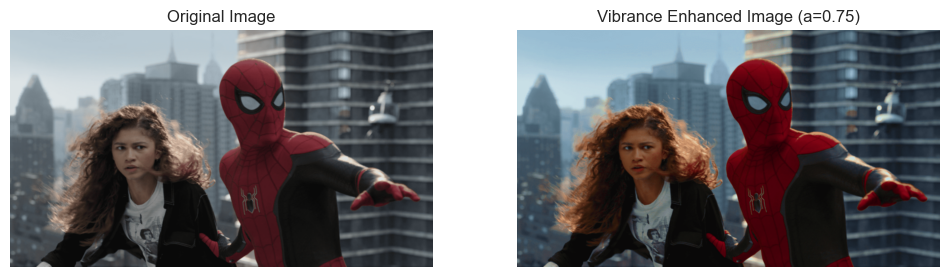

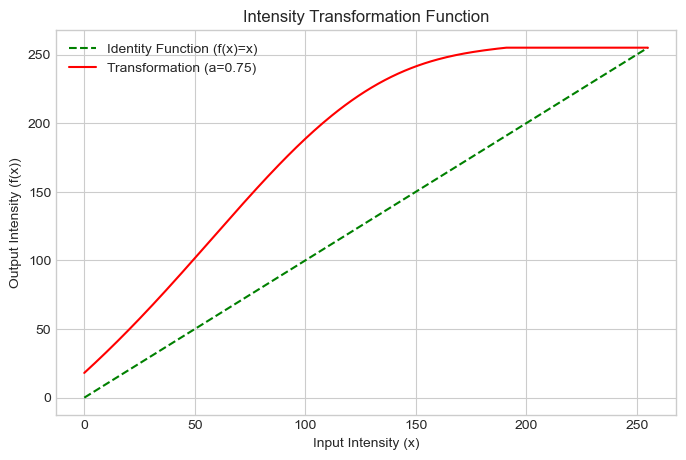

In [ ]:
img4 = cv2.imread('a1images/spider.png')

image_hsv = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV) # Convert to HSV color space

h, s, v = cv2.split(image_hsv) # Split the HSV image into H, S, V

planes = [(h, 'Hue Plane'), (s, 'Saturation Plane'), (v, 'Value Plane')]

for plane, title in planes:
    cv2.imshow(title, plane)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def intensity_transformation(x, a, sigma=70):
    exp_term = np.exp(-((x-128)**2)/(2 * sigma**2)) # Calculate the exponential part
    transformed_x = x + a * 128 * exp_term 
    return np.minimum(transformed_x, 255)

a_final = 0.75 # Started with 0.5 and kept adjusting
s_enhanced = intensity_transformation(s.astype(float), a_final)
s_enhanced = s_enhanced.astype(np.uint8)

# Merge and convert back to BGR color space
image_hsv_enhanced = cv2.merge([h, s_enhanced, v])
image_enhanced_bgr = cv2.cvtColor(image_hsv_enhanced, cv2.COLOR_HSV2BGR)

# Plotting original and enhanced
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image_enhanced_bgr, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Vibrance Enhanced Image (a={a_final})')
axes[1].axis('off')

plt.show()

# Intensity Transformation Function
x_values = np.arange(0, 256)
y_values = intensity_transformation(x_values, a_final)

plt.figure(figsize=(8, 5))
plt.plot(x_values, x_values, 'g--', label='Identity Function (f(x)=x)')
plt.plot(x_values, y_values, 'r-', label=f'Transformation (a={a_final})')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.legend()
plt.grid(True)
plt.show()

## Question 05
Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the histograms before and after equalization.  
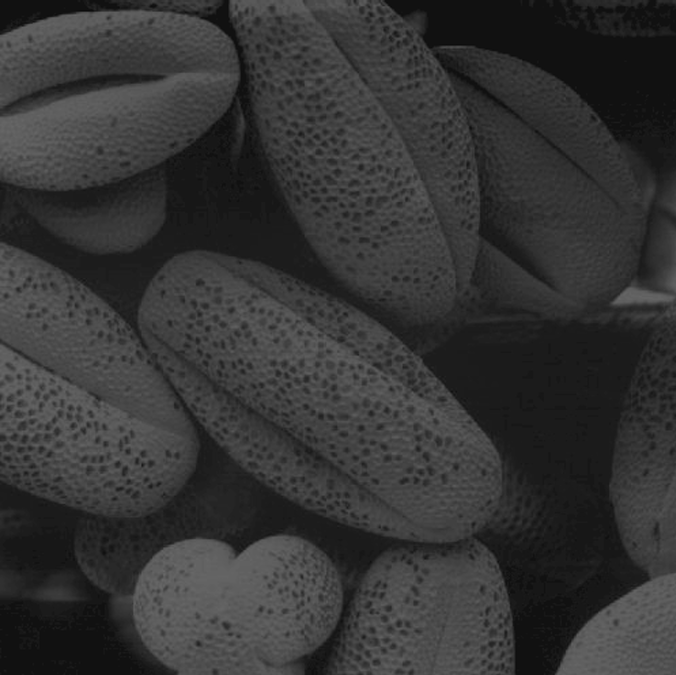

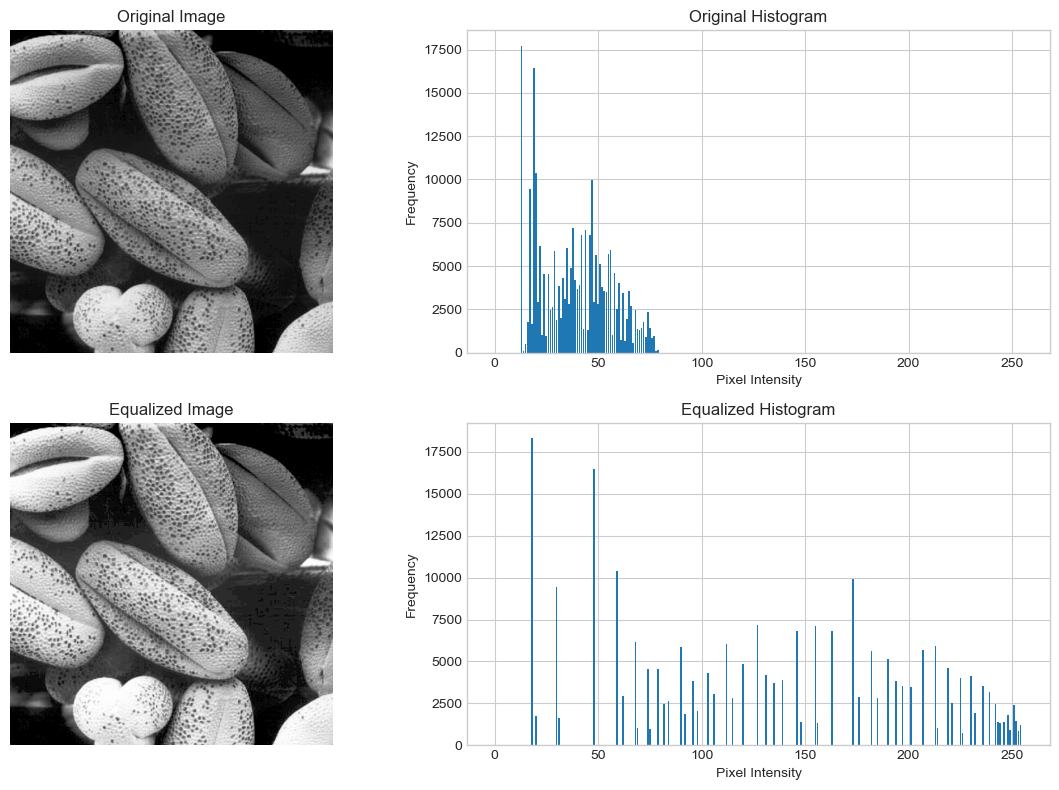

In [33]:
img5 = cv2.imread('a1images/shells.tif', cv2.IMREAD_GRAYSCALE)

def histogram_equaliation(image):
    """ 
    Outputs equalized image and histograms of both equalized and original images.
    """
    original_hist, bins = np.histogram(image.flatten(), bins = 256, range = [0,256])

    cdf = original_hist.cumsum() # Calculate CDF

    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min()) # Normalize cdf using min max scaling
    cdf_normalized = cdf_normalized.astype('uint8')

    equalized = cdf_normalized[image]
    equalized_hist, _ = np.histogram(equalized.flatten(), bins=256, range=[0,256])

    return equalized, original_hist, equalized_hist

equalized, original_hist, equalized_hist = histogram_equaliation(img5)

# Display results
plt.figure(figsize=(12, 8))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.imshow(img5, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.bar(range(256), original_hist)
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Equalized image and histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.bar(range(256), equalized_hist)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Question 06
In this question, we will apply histogram equalization only to the foreground of an image to produce an image with a histogram equalized foreground.  
(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.  
(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.  
(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.  
(d) Obtain the cumulative sum of the histogram using np.cumsum.  
(e) Use the formulas in slides to histogram-equalize the foreground.  
(f) Extract the background and add with the histogram equalized foreground.  
Show the hue, saturation, and value plane, the mask, the original image, and the result with the histogram equalized foreground.  
![image.png](a1images/jeniffer.jpg)

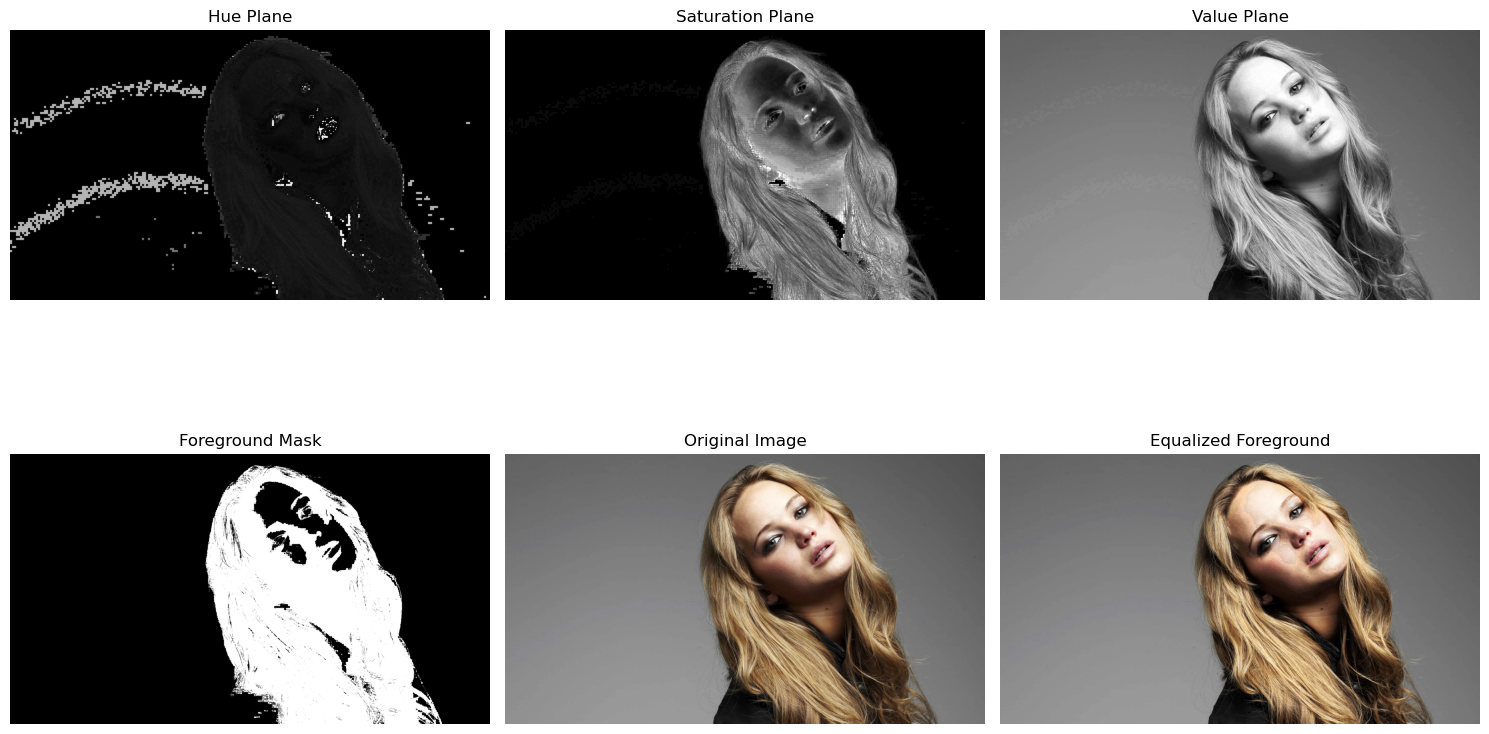

In [7]:
img6 = cv2.imread('a1images/jeniffer.jpg')

img6_hsv = cv2.cvtColor(img6, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img6_hsv)

# Apply thresholding for saturation plane (Use Otsu's Thresholding)
_, mask = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

foreground = cv2.bitwise_and(v, v, mask=mask) # Gets foreground only

hist, _ = np.histogram(foreground[mask == 255], bins=256, range=(0,256))
cumsum = np.cumsum(hist)

# Histogram equalization
cdf_min = cumsum[cumsum > 0][0] # first non-zero value
total_pixels = cumsum[-1]

# Equalization Formulae
equalized_6 = np.zeros_like(v)
scale = 255 / (total_pixels - cdf_min)

# Create Lookup Table 
lookup = np.clip((cumsum-cdf_min) * scale, 0, 255).astype('uint8')

# Apply equalization only to foreground
equalized_v = v.copy()
equalized_v[mask == 255] = lookup[v[mask == 255]]

# Create new HSV image with equalized value channel
equalized_hsv = cv2.merge([h, s, equalized_v])
equalized_img = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2BGR)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.title('Equalized Foreground')
plt.axis('off')

plt.tight_layout()
plt.show()